In [6]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [7]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


# Checking Null values in the dataframe

In [8]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [9]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

# Checking the datatypes of the columns.

In [10]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [11]:
df['salary'].unique()

array([139750, 173200,  79750, 115000, 141500,  97000, 175000, 147765,
       119250, 129000, 119800,  79800,  77700,  78000, 104800, 117150,
       101000, 103450, 124750, 137000,  89565, 102580,  93904, 113068,
        74830, 106294, 134885,  82379,  77000, 118223, 132261,  79916,
       117256,  80225, 155750,  86373, 125196, 100938, 146500,  93418,
       101299, 231545,  94384, 114778,  98193, 151768, 140096,  70768,
       126621, 108875,  74692, 106639, 103760,  83900, 117704,  90215,
       100135,  75044,  90304,  75243, 109785, 103613,  68404, 100522,
        99418, 111512,  91412, 126320, 146856, 100131,  92391, 113398,
        73266, 150480, 193000,  86100,  84240, 150743, 135585, 144640,
        88825, 122960, 132825, 152708,  88400, 172272, 107008,  97032,
       105128, 105631, 166024, 123683,  84000,  95611, 129676, 102235,
       106689, 133217, 126933, 153303, 127512,  83850, 113543,  82099,
        82600,  81500, 131205, 112429,  82100,  72500, 104279, 105000,
      

In [12]:
df.loc[df['salary']== " "]

,rank,discipline,yrs.since.phd,yrs.service,sex,salary


In [13]:
df["salary"]=df["salary"].replace(" ",np.nan)

In [14]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [15]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

# Making DataFrame for the Nominal Data

In [16]:
df_visualization_nominal=df[['rank','discipline','sex']].copy()

In [17]:
df_visualization_nominal.columns

Index(['rank', 'discipline', 'sex'], dtype='object')

# Visualization of the Data:

In [18]:
import seaborn as sns

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64


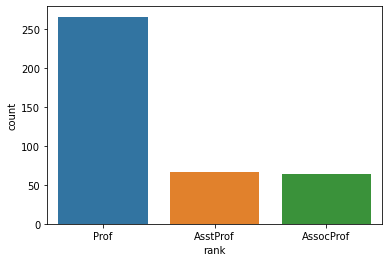

In [19]:
ax = sns.countplot(x="rank", data=df_visualization_nominal)
print(df_visualization_nominal["rank"].value_counts())

B    216
A    181
Name: discipline, dtype: int64


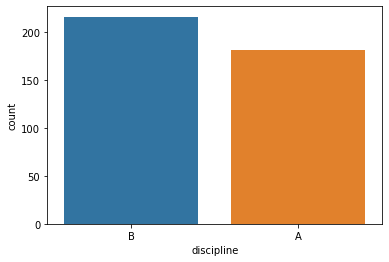

In [20]:
ax = sns.countplot(x="discipline", data=df_visualization_nominal)
print(df_visualization_nominal["discipline"].value_counts())

Male      358
Female     39
Name: sex, dtype: int64


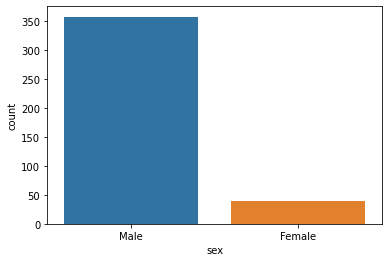

In [21]:
ax = sns.countplot(x="sex", data=df_visualization_nominal)
print(df_visualization_nominal["sex"].value_counts())

# Checking the distribution of the continuous value of the float type columns

In [22]:
df_visualization_continous=df[["yrs.since.phd","salary"]]

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

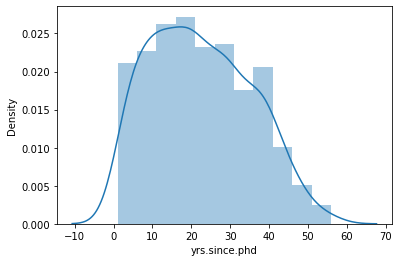

In [23]:
import seaborn as sns
sns.distplot(df_visualization_continous['yrs.since.phd'],kde=True)

<AxesSubplot:xlabel='salary', ylabel='Density'>

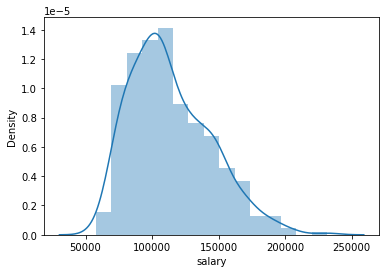

In [24]:
import seaborn as sns
sns.distplot(df_visualization_continous['salary'],kde=True)

# Making dataframe of the ordinal data:

In [25]:
df_visualization_ordinal=df[["rank","yrs.service"]].copy()

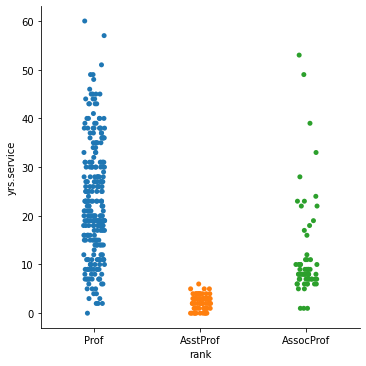

In [26]:
sns.catplot(x="rank",y="yrs.service", data=df)

# Encoding of DataFrame:

In [27]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [28]:
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [29]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
1,2.0,1.0,20,16,1.0,173200
2,1.0,1.0,4,3,1.0,79750
3,2.0,1.0,45,39,1.0,115000
4,2.0,1.0,40,41,1.0,141500
...,...,...,...,...,...,...
392,2.0,0.0,33,30,1.0,103106
393,2.0,0.0,31,19,1.0,150564
394,2.0,0.0,42,25,1.0,101738
395,2.0,0.0,25,15,1.0,95329


# Describe the dataset:

In [30]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


<AxesSubplot:>

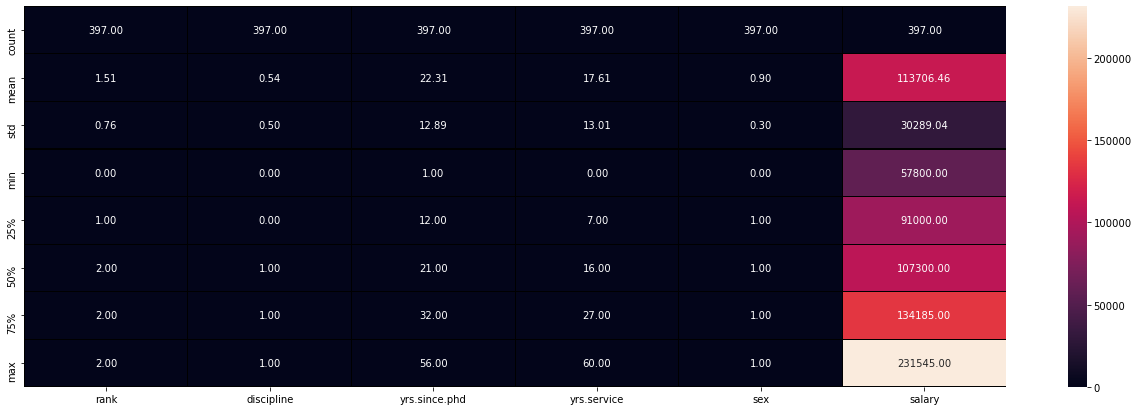

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

# Correlation of the columns with the target columns:

In [32]:
df.corr()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

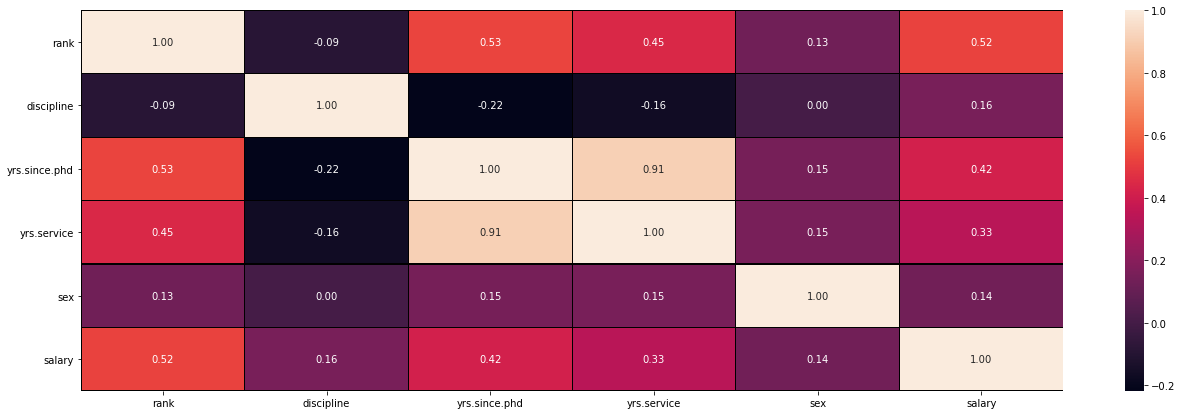

In [33]:
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

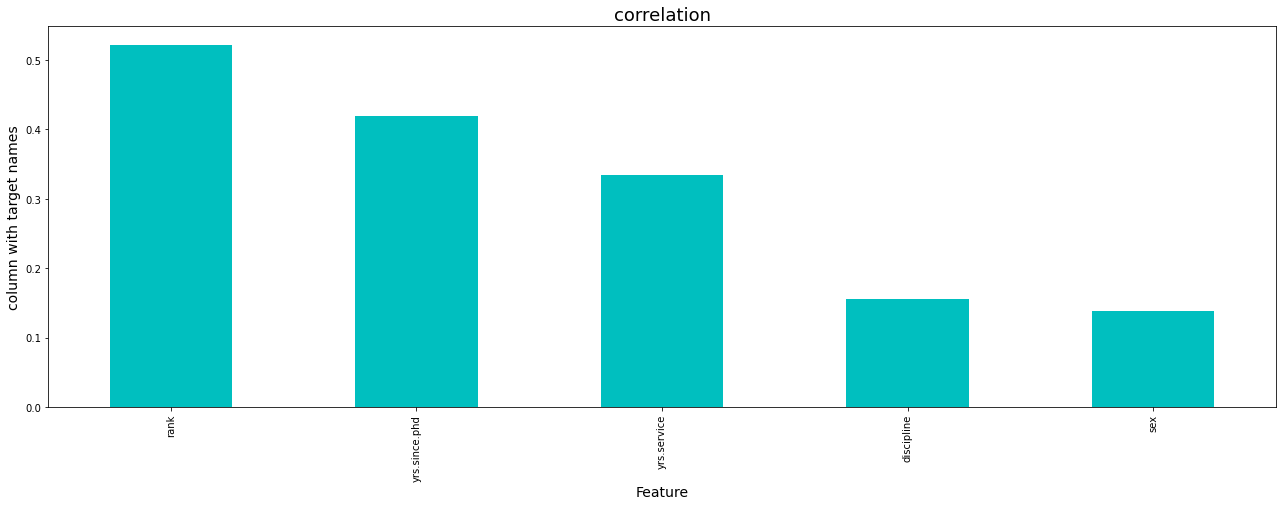

In [34]:
plt.figure(figsize=(22,7))
df.corr()['salary'].sort_values(ascending=False).drop(['salary']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [35]:
df.skew()

rank            -1.151164
discipline      -0.177684
yrs.since.phd    0.300880
yrs.service      0.650569
sex             -2.709958
salary           0.714568
dtype: float64

# Outliers Check:

In [36]:
df.dtypes

rank             float64
discipline       float64
yrs.since.phd      int64
yrs.service        int64
sex              float64
salary             int64
dtype: object

<AxesSubplot:>

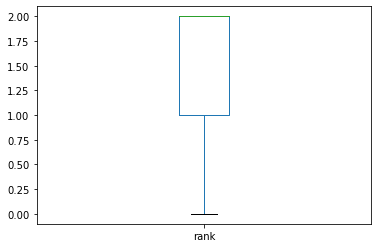

In [37]:
df['rank'].plot.box()

<AxesSubplot:>

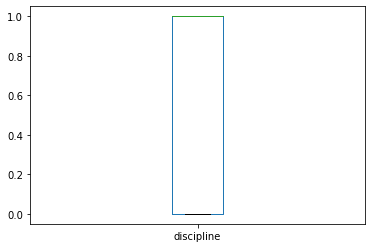

In [38]:
df['discipline'].plot.box()

<AxesSubplot:>

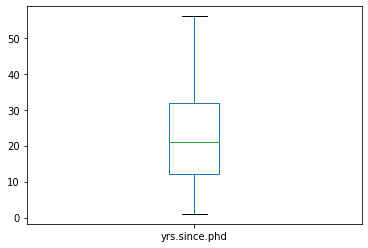

In [39]:
df['yrs.since.phd'].plot.box()

<AxesSubplot:>

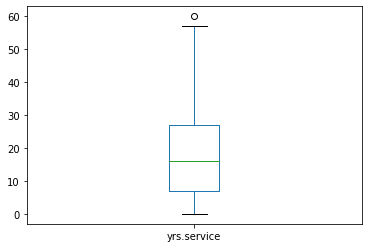

In [40]:
df['yrs.service'].plot.box()

<AxesSubplot:>

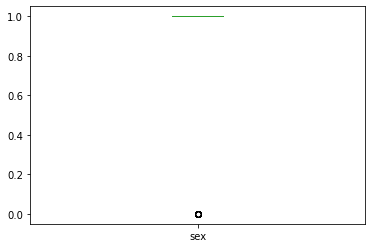

In [41]:
df['sex'].plot.box()

<AxesSubplot:>

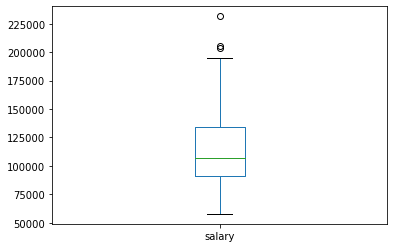

In [42]:
df['salary'].plot.box()

# Considering the outlier removal

In [43]:
from scipy.stats import zscore
import numpy as np

In [44]:
z=np.abs(zscore(df))
df.shape

(397, 6)

In [45]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [46]:
len(np.where(z>3)[0])

43

In [47]:
df_new=df[(z<3)]
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2.0,1.0,19,18,1.0,139750
0,2.0,1.0,19,18,1.0,139750
0,2.0,1.0,19,18,1.0,139750
0,2.0,1.0,19,18,1.0,139750
0,2.0,1.0,19,18,1.0,139750
...,...,...,...,...,...,...
396,1.0,0.0,8,4,1.0,81035
396,1.0,0.0,8,4,1.0,81035
396,1.0,0.0,8,4,1.0,81035
396,1.0,0.0,8,4,1.0,81035


In [48]:
df_new.shape

(2339, 6)

In [84]:
df_new=df[(z<3).all(axis=1)]
print("Old Dataframe", df.shape)
print("New Dataframe",df_new.shape)
print("total_dropped_rows", df.shape[0]-df_new.shape[0])

Old Dataframe (397, 6)
New Dataframe (354, 6)
total_dropped_rows 43


In [85]:
loss_percent=(397-354)/397*100
loss_percent

10.831234256926953

# Separating the columns into features and target:

In [51]:
features=df.drop("salary",axis=1)
target=df["salary"]

# Scaling the data using Min-Max Scaler:

In [52]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [86]:
for i in range(0,1000):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_train,pred_train)}")
    print(f"At random state {i}, the testing accuracy is:- {r2_score(target_test,pred_test)}")
    print("\n")

At random state 0, the testing accuracy is:- 0.36119999548530757
At random state 0, the testing accuracy is:- 0.40792583149752315


At random state 1, the testing accuracy is:- 0.3604245854198438
At random state 1, the testing accuracy is:- 0.4163364187662949


At random state 2, the testing accuracy is:- 0.37547390964955596
At random state 2, the testing accuracy is:- 0.36001895545266915


At random state 3, the testing accuracy is:- 0.3847313825130594
At random state 3, the testing accuracy is:- 0.329352987501086


At random state 4, the testing accuracy is:- 0.38517450334380454
At random state 4, the testing accuracy is:- 0.30440081333156155


At random state 5, the testing accuracy is:- 0.3950033630150771
At random state 5, the testing accuracy is:- 0.2752907752774736


At random state 6, the testing accuracy is:- 0.3650308031752798
At random state 6, the testing accuracy is:- 0.4018987080607571


At random state 7, the testing accuracy is:- 0.3575963886324032
At random state 7, th

In [87]:
 features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=12)

In [88]:
lr.fit(features_train,target_train)

LinearRegression()

In [89]:
pred_test=lr.predict(features_test)

In [90]:
print(r2_score(target_test,pred_test))

0.34397033297856505


# Regularization:

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [93]:
from sklearn.linear_model import Lasso

parameters = {'alpha':[.0001, .001, .01, 1, 10],'random_state':list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [94]:
ls = Lasso(alpha=1,random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train,target_train)
pred_ls = ls.predict(features_test)

lss = r2_score(target_test,pred_ls)
lss

0.34396037220932285

In [95]:
cv_score=cross_val_score(ls,features,target,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.29570517244481886

# Ensemble technique:

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters = {'criterion':['mse', 'mae'],'max_features':["auto", "sqrt", "log2"]}
rf =RandomForestRegressor()
clf = GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [97]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision = rf.predict(features_test)

rfs = r2_score(target_test,pred_decision)
print('R2 Score:',rfs*100)

rfscore = cross_val_score(rf,features,target,cv=5)
rfc = rfscore.mean()
print('Cross val Score:',rfc*100)

R2 Score: 28.724284218362605
Cross val Score: 22.49136298423365


In [98]:
import pickle
filename = 'Score.pkl'
pickle.dump(rf, open(filename, 'wb'))